In [1]:
import math

In [2]:
def sig(x):
    y = math.exp(x) / (1 + math.exp(x))
    return y

In [3]:
sig(1.5)

0.8175744761936437

In [4]:
a = math.log(1-sig(1))+math.log(sig(2))+math.log(sig(3))+math.log(1-sig(1.5))
a

-3.1901903281176898

In [5]:
-a/4

0.7975475820294224

In [6]:
import numpy as np

X = np.array ([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]])
v = np.array([13, 14, 15, 16])

v.shape

(4,)

In [7]:
np.zeros(3)

array([0., 0., 0.])

In [8]:
# X and v are numpy ndarrays
# X.shape == (N, M), v.shape == (M,)
u1 = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u1[i] += X[i, j] * v[j]
       
u1

array([150., 382., 614.])

In [9]:
u = X @ v
print (u)

if (u.all()==u1.all()):
    print("t")
else:
    print("f")
    
u

[150 382 614]
t


array([150, 382, 614])

In [10]:
if (u.shape==u1.shape):
    print("t")
else:
    print("f")

t


In [11]:
type(u)

numpy.ndarray

In [12]:
import numpy as np
# v = np.array([13, 14, 15, 16])
X = np.array ([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12]])

# y = v - v.mean(axis=0, keepdims=True)
# y = v - v.mean(axis=0).reshape(-1, 1)
# y

Y = X - X.mean(axis=1, keepdims=True)
# Y = X - X.mean(axis=1).reshape(-1, 1)
Y

array([[-1.5, -0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5,  1.5],
       [-1.5, -0.5,  0.5,  1.5]])

In [13]:
m = 0
for i in range(len(Y)):
    y = Y[i] @ Y[i].T
    m += y

m

15.0

In [14]:
np.sum(np.diagonal(np.dot(Y, Y.T)))

15.0

In [15]:
X.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [16]:
np.zeros(shape=(len(Y),1))

array([[0.],
       [0.],
       [0.]])

In [17]:
V = v.reshape(-1,1)
V

array([[13],
       [14],
       [15],
       [16]])

In [18]:
V / 2


array([[6.5],
       [7. ],
       [7.5],
       [8. ]])

In [19]:
import numpy as np

In [20]:
def load_tsv_dataset(file):
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset

In [21]:
dataset = load_tsv_dataset(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\smalldata\train_data.tsv')
label = [x[0] for x in dataset]
review = [x[1] for x in dataset]
MAX_WORD_LEN = len(max(review, key=len))

In [22]:
def load_dictionary(file, MAX_WORD_LEN):
    dict_map = np.loadtxt(file, comments=None, encoding='utf-8',
                          dtype=f'U{MAX_WORD_LEN},l')
    return {word: index for word, index in dict_map}

In [ ]:
dic = load_dictionary(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\dict.txt', MAX_WORD_LEN)

In [ ]:
label = np.array(label)
label = label.reshape(-1,1)

In [ ]:
review_a = np.array(review)
r = review[0].split(" ")

In [ ]:
r_1 = []
for word in r:
    if word in dic.keys():
        r_1.append(1)
    else:
        r_1.append(0)
       
r_1 = np.array(r_1)
len(r_1)

In [ ]:
r = review[1].split(" ")

In [ ]:
r_2 = []
for word in r:
    if word in dic.keys():
        r_2.append(1)
    else:
        r_2.append(0)
r_2 = np.array(r_1)
len(r_2)

In [ ]:
y = np.vstack((r_1, r_2))
y.shape

In [ ]:
import numpy as np

In [ ]:
def load_tsv_dataset(file):    
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset

In [ ]:
def load_dictionary(file, MAX_WORD_LEN):
    dict_map = np.loadtxt(file, comments=None, encoding='utf-8',
                          dtype=f'U{MAX_WORD_LEN},l')
    return {word: index for word, index in dict_map}

In [ ]:
def model_1(dataset, dic):
    label = [x[0] for x in dataset]
    review = [x[1] for x in dataset]
    N = len(review)
    M = len(dic.keys())
    z = np.zeros((N, M+1))
    for i in range(N):
        z[i,0] = label[i]
        for word in review[i].split(' '):
            if word in dic.keys():
                z[i, dic[word]+1] = 1
    return z

In [ ]:
dataset = load_tsv_dataset(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\smalldata\train_data.tsv')
MAX_WORD_LEN = 64
dic = load_dictionary(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\dict.txt', MAX_WORD_LEN)

In [ ]:
matrix = model_1(dataset, dic)

In [ ]:
matrix.shape

In [ ]:
import numpy as np
import csv

In [ ]:
def load_tsv_dataset(file):    
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset

In [ ]:
def load_feature_dictionary(file):
    word2vec_map = dict()
    with open(file) as f:
        read_file = csv.reader(f, delimiter='\t')
        for row in read_file:
            word, embedding = row[0], row[1:]
            word2vec_map[word] = np.array(embedding, dtype=float)
    return word2vec_map

In [ ]:
dataset = load_tsv_dataset(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\smalldata\train_data.tsv')
word2vec_map = load_feature_dictionary(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\word2vec.txt')
VECTOR_LEN = 300

In [ ]:
from collections import Counter

label = [x[0] for x in dataset]
review = [x[1] for x in dataset]
summ = np.zeros(VECTOR_LEN)
z = np.zeros((len(reviews), VECTOR_LEN))
for j in range(len(review)):
    counter = Counter(review[j])
    review_unique = np.unique(review[j].split(' '))
    for i in range(len(review_unique)):
        times =  counter[review_unique[i]]
        if review_unique[i] in word2vec_map.keys():
            vector = word2vec_map[review_unique[i]]
            summ += times * vector
    z[j] = summ
result = np.hstack((np.array(label).reshape(-1,1), z))  

In [ ]:
a = 2
b = 3
result = int((a * b > 0))
result

In [ ]:
import numpy as np

input = r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\largeoutput\model1_formatted_train.tsv'
dataset = np.loadtxt(input)
y = dataset[:, 0]
xx = dataset[:, 1:]
xy = np.ones((dataset.shape[0], 1))
X = np.hstack((xy, xx))

In [ ]:
theta = np.zeros(X.shape[1])
theta

In [ ]:
m, n = dataset.shape
m, n 

In [ ]:
dataset.shape[0]

In [ ]:
result = (np.dot(X, theta) > 0).astype(int)
result

In [1]:
import numpy as np
import csv

def load_tsv_dataset(file):
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset

def load_feature_dictionary(file):
    word2vec_map = dict()
    with open(file) as f:
        read_file = csv.reader(f, delimiter='\t')
        for row in read_file:
            word, embedding = row[0], row[1:]
            word2vec_map[word] = np.array(embedding, dtype=float)
    return word2vec_map

In [4]:
dataset = load_tsv_dataset(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\smalldata\train_data.tsv')
word2vec_map = load_feature_dictionary(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\word2vec.txt')

In [9]:
result = []
for label, review in dataset:
    count = 0
    vector = np.zeros(300)
    for word in review.split(" "):
        if word in word2vec_map:
            count += 1
            vector += word2vec_map[word]
    result.append(np.concatenate([[float(label)], vector / count], axis=0))
    
result

[array([ 1.00000000e+00, -2.17604687e-01,  1.31492187e-01, -3.70685937e-01,
         5.84496875e-01,  5.26031250e-01, -1.24926562e+00, -6.81328125e-01,
         1.85745313e-01,  4.70837500e-01,  8.53250000e-02, -1.02249844e+00,
        -2.31328125e-02, -9.28400000e-01,  7.08700000e-01, -5.63681250e-01,
        -2.81923437e-01, -1.18085312e+00, -3.09779687e-01, -3.13990625e-01,
         1.44297344e+00, -1.19072500e+00,  1.24910156e+00,  9.01379687e-01,
         4.14234375e-01,  4.82145313e-01,  1.77579688e+00, -1.06677344e+00,
         3.01189063e-01, -1.71153125e-01, -8.12814063e-01, -4.63962500e-01,
        -8.70443750e-01, -7.25879687e-01, -6.93287500e-01,  1.51392344e+00,
         1.71682344e+00,  1.66389844e+00, -9.38271875e-01,  1.71097656e+00,
        -1.95517031e+00, -5.18742187e-01, -1.10626563e-01, -4.96718750e-03,
        -1.29140625e+00, -2.21908750e+00, -7.13910938e-01, -4.04318750e-01,
         1.12998750e+00, -1.60607344e+00,  3.95387500e-01,  5.94476563e-01,
        -1.0

plot 7.7 model3

In [21]:
import numpy as np

def load_tsv_dataset(file):
    dataset = np.loadtxt(file)
    return dataset

In [22]:
data = load_tsv_dataset(r"C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\model3_val_nll.txt")

In [27]:
number = [x[0] for x in data]
log = [x[1] for x in data]

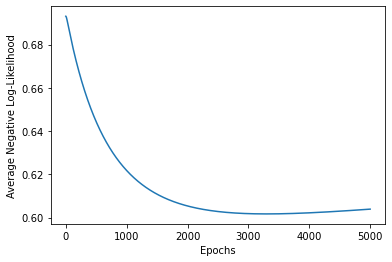

In [30]:
from matplotlib import pyplot as plt

plt.xlabel("Epochs") 
plt.ylabel("Average Negative Log-Likelihood") 
plt.plot(number,log) 
plt.show()

plot 7.1 model1, largedata train and validation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_dataset = np.loadtxt(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\largeoutput\model1_formatted_train.tsv')
train_label = train_dataset[:, 0]
train_matrix = train_dataset[:, 1:]

In [3]:
valid_dataset = np.loadtxt(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\largeoutput\model1_formatted_valid.tsv')
valid_label = train_dataset[:, 0]
valid_matrix = train_dataset[:, 1:]

In [13]:
def train(matrix, label, num_epoch, learning_rate):
    m, n = matrix.shape
    theta = np.zeros(n+1)
    intercept = np.ones((m, 1))
    feature = np.hstack((intercept, matrix))
    thetas = np.zeros((num_epoch, n+1))
    for epoch in range(num_epoch):
        for i in range(m):
            x_i = feature[i]
            y_i = label[i]
            theta += learning_rate * x_i * (y_i - sigmoid(np.dot(theta, x_i)))
        thetas[epoch] = theta
    return thetas, feature

In [5]:
def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)

In [6]:
def predict(theta, X):
    prediction = (np.dot(X, theta) > 0).astype(int)
    return prediction

In [7]:
num_epoch = 5000

In [14]:
train_thetas, train_feature = train(train_matrix, train_label, num_epoch, 0.01)

In [9]:
valid_thetas, valid_feature = train(valid_matrix, valid_label, num_epoch, 0.01)

In [25]:
from math import log
from math import exp

train_nll = []
for j in range(train_thetas.shape[0]):
    nll = 0
    for i in range(len(train_label)):
        a =  log(1 + exp(np.dot(train_thetas[j], train_feature[i].T))) - train_label[i] * np.dot(train_thetas[j], train_feature[i].T)
        nll += a
                 
    train_nll.append(nll / len(train_label))  

train_nll

[3.1842792394348964,
 3.0325522508684704,
 2.9081617059849347,
 2.7961646615181035,
 2.6895627031794436,
 2.5895584735032644,
 2.4949868376075868,
 2.4048996596186356,
 2.3187357026443607,
 2.2361197037535034,
 2.1566782515456384,
 2.080013574341573,
 2.00578474882705,
 1.9337626765280376,
 1.8638227061794976,
 1.7959081204629987,
 1.7299926829142873,
 1.6660554155853469,
 1.6040697009303488,
 1.5440015708208887,
 1.4858115437900683,
 1.4294567990909182,
 1.3748922158764978,
 1.3220699095385031,
 1.2709378480549953,
 1.221438674708809,
 1.1735097789856772,
 1.1270850205205525,
 1.082097674344389,
 1.038483646649115,
 0.9961840759363008,
 0.955146882371004,
 0.9153272789697084,
 0.8766875033275036,
 0.8391960750662597,
 0.8028268263822144,
 0.7675578719566994,
 0.7333706187335196,
 0.7002488726395261,
 0.6681780725288076,
 0.6371446642145099,
 0.6071356137660818,
 0.5781380467473684,
 0.5501389901139966,
 0.5231251892707107,
 0.49708297571333854,
 0.4719981687121534,
 0.4478560035213843

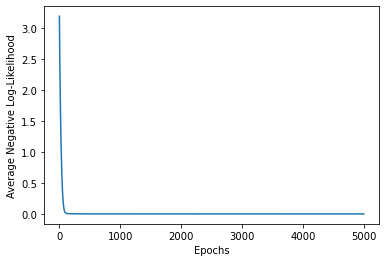

In [26]:
epoches = range(5000)

plt.xlabel("Epochs") 
plt.ylabel("Average Negative Log-Likelihood") 
plt.plot(epoches,train_nll) 
plt.show()

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
def dot(A, B):
    return np.dot(A, B)


def exp(A):
    return np.exp(A)


def forward(X, W):
    Y_hat = 1 / (1 + exp(-dot(X, W.T)))
    # print(Y_hat)
    Y_hat = np.where(Y_hat >= 0.5, 1, 0)
    # print(Y_hat)
    return Y_hat


def SGD(X, Y, W, a, N):
    Y_hat = Y - exp(dot(X, W.T)) / (1 + exp(dot(X, W.T)))
    # delta = dot(X.T, Y_hat)
    delta = Y_hat * X
    W -= a * delta / N
    return W

def train(X, Y, epoch, X_val, Y_val):
    a = 0.01
    W = np.zeros((1, X.shape[1]))
    losses_train = []
    losses_val = []
    epochs = list(range(epoch))
    for i in tqdm(range(epoch)):
        for j in range(X.shape[0]):
            W = SGD(X[j], Y[j], W, a, X.shape[0])
        loss_val = 0
        loss_train = 0
        for j in range(X.shape[0]):
            loss_train += J(X[j], Y[j], W)
        for j in range(X_val.shape[0]):
            loss_val += J(X_val[j], Y_val[j], W)
        loss_train /= X.shape[0]
        loss_val /= X_val.shape[0]
        # loss_val = J(X_val, Y_val, W)
        losses_train.append(loss_train)
        losses_val.append(loss_val)
#         print("train", loss_train)
#         print("val", loss_val)

    fig, ax = plt.subplots()
    ax.plot(epochs, losses_train, label='train')
    ax.plot(epochs, losses_val, label='val')
    ax.legend(loc='upper right')
    plt.title('model_1')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    # print(W)
    return losses_train, losses_val


def J(data, label, theta):
    return -label * np.dot(theta, data) + np.log(1 + np.exp(np.dot(theta, data)))

In [17]:
def read_data(file):
    X = []
    Y = []
    with open(file) as f:
        for line in f:
            data = line.split('\t')
            Y.append(int(float(data[0])))
            X.append(np.array(['1'] + data[1:], dtype=float))
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y

In [18]:
X, Y = read_data(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\largeoutput\model1_formatted_train.tsv')
X_val, Y_val = read_data(r'C:\Users\Zheyi\Documents\CMU\10601\hw4\handout\largeoutput\model1_formatted_valid.tsv')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:30<00:00, 16.28it/s]


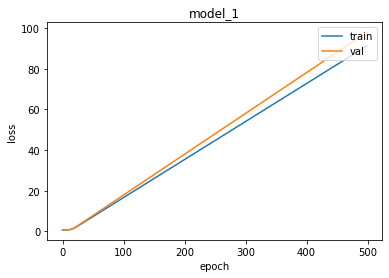

([array([0.69468315]),
  array([0.69640706]),
  array([0.69843188]),
  array([0.70092838]),
  array([0.70415155]),
  array([0.70847744]),
  array([0.71445249]),
  array([0.72285616]),
  array([0.73477312]),
  array([0.7516625]),
  array([0.77539734]),
  array([0.80823046]),
  array([0.85263623]),
  array([0.91100206]),
  array([0.98521252]),
  array([1.0762565]),
  array([1.18402095]),
  array([1.30736139]),
  array([1.44440174]),
  array([1.59292177]),
  array([1.75069531]),
  array([1.91571088]),
  array([2.08627387]),
  array([2.2610236]),
  array([2.43890278]),
  array([2.61910788]),
  array([2.80103698]),
  array([2.98424322]),
  array([3.16839654]),
  array([3.3532537]),
  array([3.53863551]),
  array([3.7244098]),
  array([3.91047884]),
  array([4.09677022]),
  array([4.28323003]),
  array([4.46981803]),
  array([4.65650406]),
  array([4.84326539]),
  array([5.03008486]),
  array([5.21694941]),
  array([5.4038491]),
  array([5.5907763]),
  array([5.77772516]),
  array([5.9646911

In [20]:
epoch = 500
train(X, Y, epoch, X_val, Y_val)